In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pickle
import pandas as pd

In [3]:
database = pickle.load(open('../data/my-mortality/mingie_34features.pkl', 'rb'))

In [17]:
feature_names = np.array(database['test']['feature_names'] + database['test']['covs_names'])

# See the DFRRank folder for more information of the ranking
# Ranking is [13, 30, 15, 34, 27, 28, 24]
for k in feature_names[[13, 30, 15, 34, 27, 28, 24, 3, 4, 33, 12, 20, 32, 14, 19, 1, 11, 29, 36, 18, 23, 17, 22, 38, 10
, 35, 16, 39, 8, 37, 2, 21, 31, 9, 7, 0, 5, 6, 26, 41, 25, 40]]:
    print(k)

Glascow coma scale total
Urine output
Heart Rate
Age
Respiratory rate
Systolic blood pressure
Platelets
Blood urea nitrogen
CO2
pH
Fraction inspired oxygen
Oxygen saturation
White blood cell count
Glucose
Mean blood pressure
Bicarbonate
Diastolic blood pressure
Temperature
Ethnicity_0
Magnesium
Partial thromboplastin time
Lactate
Partial pressure of oxygen
Ethnicity_2
Creatinine
Gender
Hemoglobin
Ethnicity_3
Chloride
Ethnicity_1
Bilirubin
Partial pressure of carbon dioxide
Weight
Cholesterol
Capillary refill rate
Albumin
Calcium
Calcium ionized
Prothrombin time
Ethnicity_5
Potassium
Ethnicity_4


## Analyze training set measurement interval

In [4]:
time_intervals = []
for p_i, T in enumerate(database['train']['Ts']):
    for i in range(len(T) - 1):
        time_intervals.append(T[i + 1] - T[i])
    
    if p_i % 1000 == (1000 - 1):
        print('Processed [%d / %d] patients' % (p_i, len(database['train']['Ts'])))

Processed [999 / 35494] patients
Processed [1999 / 35494] patients
Processed [2999 / 35494] patients
Processed [3999 / 35494] patients
Processed [4999 / 35494] patients
Processed [5999 / 35494] patients
Processed [6999 / 35494] patients
Processed [7999 / 35494] patients
Processed [8999 / 35494] patients
Processed [9999 / 35494] patients
Processed [10999 / 35494] patients
Processed [11999 / 35494] patients
Processed [12999 / 35494] patients
Processed [13999 / 35494] patients
Processed [14999 / 35494] patients
Processed [15999 / 35494] patients
Processed [16999 / 35494] patients
Processed [17999 / 35494] patients
Processed [18999 / 35494] patients
Processed [19999 / 35494] patients
Processed [20999 / 35494] patients
Processed [21999 / 35494] patients
Processed [22999 / 35494] patients
Processed [23999 / 35494] patients
Processed [24999 / 35494] patients
Processed [25999 / 35494] patients
Processed [26999 / 35494] patients
Processed [27999 / 35494] patients
Processed [28999 / 35494] patie

In [5]:
df = pd.DataFrame(time_intervals)
df = df * 60
df.describe()

,0
count,4.844186e+06
mean,3.689998e+01
std,3.106812e+01
min,0.000000e+00
25%,1.200000e+01
50%,3.700000e+01
75%,6.000000e+01
max,4.285000e+03


Text(0.5,0,'mins')

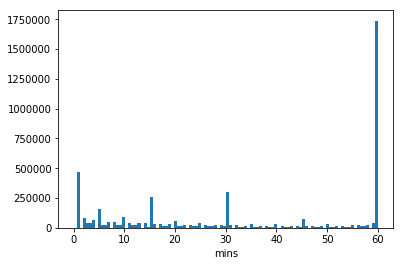

In [6]:
plt.hist(df.values, bins=100, range=(0, 60))
plt.xlabel('mins')

In [11]:
time_intervals = [[] for _ in range(34)]
for p_i, (T, ind_kt, ind_kf, Y) in enumerate(zip(database['train']['Ts'], 
                                         database['train']['ind_kts'], 
                                         database['train']['ind_kfs'], 
                                         database['train']['Ys'])):
    prev_time = [None] * 34
    for m_idx in range(len(ind_kt)):
        if prev_time[ind_kf[m_idx]] is None:
            prev_time[ind_kf[m_idx]] = T[ind_kt[m_idx]]
            continue
            
        the_time = T[ind_kt[m_idx]]
        time_intervals[ind_kf[m_idx]].append(the_time - prev_time[ind_kf[m_idx]])
        
    if p_i % 1000 == (1000 - 1):
        print('Processed [%d / %d] patients' % (p_i, len(database['train']['Ts'])))

Processed [999 / 35494] patients
Processed [1999 / 35494] patients
Processed [2999 / 35494] patients
Processed [3999 / 35494] patients
Processed [4999 / 35494] patients
Processed [5999 / 35494] patients
Processed [6999 / 35494] patients
Processed [7999 / 35494] patients
Processed [8999 / 35494] patients
Processed [9999 / 35494] patients
Processed [10999 / 35494] patients
Processed [11999 / 35494] patients
Processed [12999 / 35494] patients
Processed [13999 / 35494] patients
Processed [14999 / 35494] patients
Processed [15999 / 35494] patients
Processed [16999 / 35494] patients
Processed [17999 / 35494] patients
Processed [18999 / 35494] patients
Processed [19999 / 35494] patients
Processed [20999 / 35494] patients
Processed [21999 / 35494] patients
Processed [22999 / 35494] patients
Processed [23999 / 35494] patients
Processed [24999 / 35494] patients
Processed [25999 / 35494] patients
Processed [26999 / 35494] patients
Processed [27999 / 35494] patients
Processed [28999 / 35494] patie

Text(0.5,0,'hours')

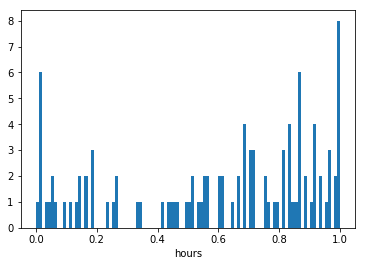

In [17]:
plt.hist(time_intervals[3], bins=100, range=(0, 1))
plt.xlabel('hours')

## Plot a series of plots w.r.t. different action combinations

### First see a combinations of actions in each measurement time

In [18]:
def map_arr_of_actions_to_idx(action_arr):
    idx = 0
    for action in action_arr:
        idx += 2 ** action
    return idx

def map_idx_to_arr_of_actions(idx):
    arr = []
    
    action_idx = 0
    while idx > 0:
        offset = idx % 2
        if offset > 0:
            arr.append(action_idx)
        
        idx = (idx - offset) / 2
        action_idx += 1
    return arr

In [19]:
database['train'].keys()

dict_keys(['Ys', 'Ts', 'ind_kts', 'ind_kfs', 'labels', 'covs', 'rel_end_time', 'feature_names', 'num_features', 'covs_names'])

In [31]:
import pandas as pd
train_df = pd.read_csv('../data/my-mortality/train/listfile.csv')
train_df[]

,icustay,filename,intime,outtime,los,mortality,deathtime,death_rel_hours
0,238575,23986_episode1_timeseries.csv,2165-10-13 06:21:45,2165-10-16 22:43:29,88.3632,0,NaN,NaN
1,265217,65268_episode1_timeseries.csv,2117-04-09 15:06:07,2117-04-15 19:13:34,148.1232,1,2117-04-15 17:00:00,145.898056
2,285661,6675_episode1_timeseries.csv,2192-06-27 12:16:27,2192-06-28 14:31:47,26.2560,0,NaN,NaN
3,206534,21988_episode1_timeseries.csv,2178-10-08 07:13:52,2178-10-10 18:32:10,59.3040,0,NaN,NaN
4,240666,7063_episode1_timeseries.csv,2198-02-16 15:01:00,2198-02-18 10:06:00,43.0824,0,NaN,NaN
5,232906,7883_episode2_timeseries.csv,2180-03-30 11:27:47,2180-03-31 14:18:25,26.8440,0,NaN,NaN
6,270596,73081_episode1_timeseries.csv,2113-11-04 19:08:24,2113-11-05 15:18:46,20.1720,0,NaN,NaN
7,279565,80117_episode1_timeseries.csv,2150-07-08 23:51:17,2150-07-10 21:16:56,45.4272,0,NaN,NaN
8,223928,3722_episode3_timeseries.csv,2147-09-07 23:11:48,2147-09-21 16:52:26,329.6784,0,NaN,NaN
9,225465,13033_episode14_timeseries.csv,2183-07-23 23:19:39,2183-07-26 16:50:08,65.5080,0,NaN,NaN


In [20]:
result_arr = np.zeros(1024)

num_sth_wrong = 0
for p_i, (ind_kt, ind_kf, Y) in enumerate(zip(database['train']['ind_kts'], 
                                    database['train']['ind_kfs'], 
                                    database['train']['Ys'])):
    action_arr = []
    prev_idx = 0
    for m_i, (ind_t, ind_f, y) in enumerate(zip(ind_kt, ind_kf, Y)):
        if ind_t == prev_idx:
            action_arr.append(ind_f)
        else:
            idx = map_arr_of_actions_to_idx(action_arr)
            if idx >= 1024:
                num_sth_wrong += 1
                import pdb; pdb.set_trace()            
            else:
                result_arr[idx] += 1
            
            del action_arr
            action_arr = []
            action_arr.append(ind_f)
            prev_idx = ind_t
    if len(action_arr) > 0:
        idx = map_arr_of_actions_to_idx(action_arr)
        if idx >= 1024:
            num_sth_wrong += 1
        else:
            result_arr[idx] += 1

        del action_arr
print('total wrong %d' % num_sth_wrong)

> <ipython-input-20-dd45ac4e6055>(20)<module>()
-> del action_arr
(Pdb) c
> <ipython-input-20-dd45ac4e6055>(16)<module>()
-> import pdb; pdb.set_trace()
(Pdb) c
> <ipython-input-20-dd45ac4e6055>(20)<module>()
-> del action_arr
(Pdb) c
> <ipython-input-20-dd45ac4e6055>(16)<module>()
-> import pdb; pdb.set_trace()
(Pdb) c
> <ipython-input-20-dd45ac4e6055>(20)<module>()
-> del action_arr
(Pdb) c
> <ipython-input-20-dd45ac4e6055>(16)<module>()
-> import pdb; pdb.set_trace()
(Pdb) c
> <ipython-input-20-dd45ac4e6055>(20)<module>()
-> del action_arr
(Pdb) c
> <ipython-input-20-dd45ac4e6055>(16)<module>()
-> import pdb; pdb.set_trace()
(Pdb) c
> <ipython-input-20-dd45ac4e6055>(20)<module>()
-> del action_arr
(Pdb) c
> <ipython-input-20-dd45ac4e6055>(16)<module>()
-> import pdb; pdb.set_trace()
(Pdb) c
> <ipython-input-20-dd45ac4e6055>(20)<module>()
-> del action_arr
(Pdb) c
> <ipython-input-20-dd45ac4e6055>(16)<module>()
-> import pdb; pdb.set_trace()
(Pdb) c
> <ipython-input-20-dd45ac4e6055>(

BdbQuit: 

In [56]:
result_arr = np.array(result_arr)

rank = result_arr.argsort()[::-1]

In [59]:
database['train']['feature_names']

['Heart Rate',
 'Systolic blood pressure',
 'Urine output',
 'Respiratory rate',
 'Blood urea nitrogen',
 'Creatinine',
 'Glascow coma scale total',
 'pH',
 'Partial pressure of oxygen',
 'White blood cell count']

In [80]:
pd.options.display.max_rows = 100

In [84]:
total_actions = result_arr.sum()
table = []

for idx in rank:
    if result_arr[idx] == 0:
        break
    action_arr = map_idx_to_arr_of_actions(idx)
    
    table.append([action_arr, result_arr[idx], '{:.2f}%'.format(result_arr[idx] / total_actions * 100),
                  [database['train']['feature_names'][idx] for idx in action_arr]])

pd_table = pd.DataFrame(table)
pd_table.columns = ['actions', 'counts', 'percentage', 'names']
pd_table

,actions,counts,percentage,names
0,"[0, 1, 3]",1206066.0,28.80%,"[Heart Rate, Systolic blood pressure, Respirat..."
1,"[0, 1, 2, 3]",1086115.0,25.93%,"[Heart Rate, Systolic blood pressure, Urine ou..."
2,"[0, 3]",290486.0,6.94%,"[Heart Rate, Respiratory rate]"
3,"[0, 1, 2, 3, 6]",287574.0,6.87%,"[Heart Rate, Systolic blood pressure, Urine ou..."
4,"[0, 1, 3, 6]",161485.0,3.86%,"[Heart Rate, Systolic blood pressure, Respirat..."
5,[1],155462.0,3.71%,[Systolic blood pressure]
6,[7],154985.0,3.70%,[pH]
7,[2],133966.0,3.20%,[Urine output]
8,"[7, 8]",125070.0,2.99%,"[pH, Partial pressure of oxygen]"
9,[3],119591.0,2.86%,[Respiratory rate]


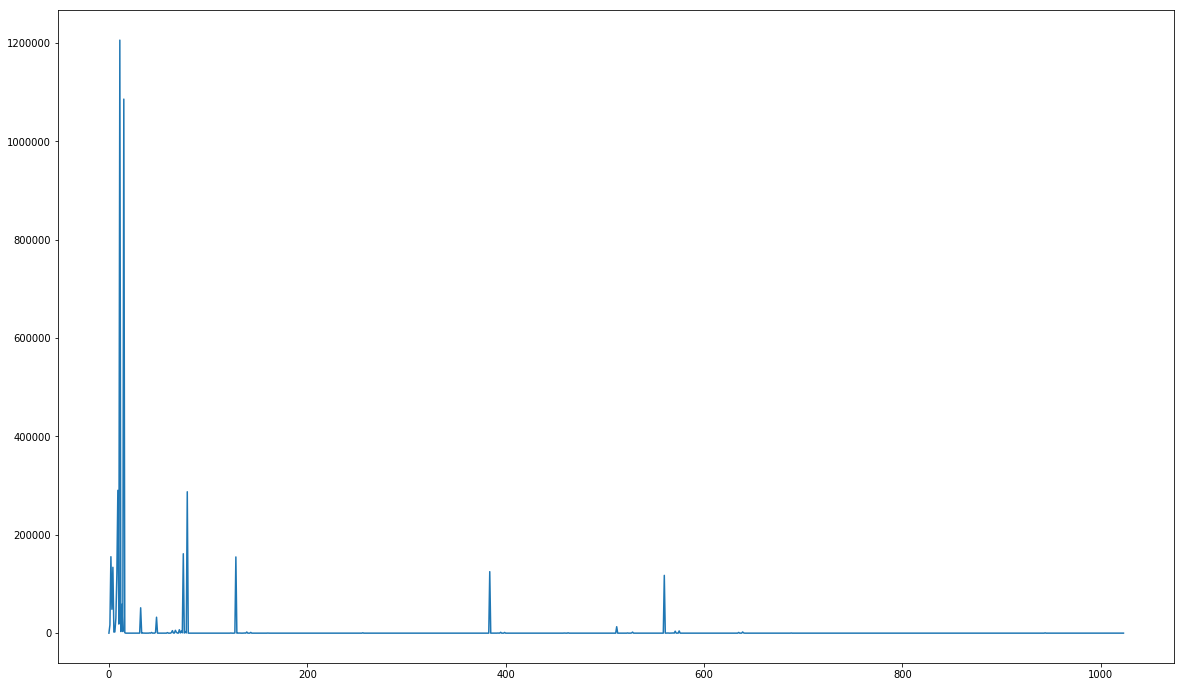

In [41]:
fig, ax = plt.subplots(figsize=(20, 12))
ax.plot(result_arr[])

In [ ]:
time_intervals = []
for p_i, T in enumerate(database['train']['Ts']):
    for i in range(len(T) - 1):
        time_intervals.append(T[i + 1] - T[i])
    
    if p_i % 1000 == (1000 - 1):
        print('Processed [%d / %d] patients' % (p_i, len(database['train']['Ts'])))